In [1]:
import re
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# Sample false positives load from txt file where separated by newline
with open("../output/false_positives.txt", "r") as file:
    fp_list = file.read().splitlines()
    false_positives = [val.split(',')[0] for val in fp_list]
false_positives

['egad00001008484',
 'nr_164153.1',
 'egas00001005950',
 'https://vch-interactome.uni-jena.de/',
 'gse275822',
 'bmrb 52262',
 'tcga',
 '8pba',
 's-scdt-10_1038-s44320-024-00071-4',
 'emd-17582',
 'up000032841',
 'hg916826.1',
 '8c0v',
 '8c0w',
 'emd-16372',
 'empiar-11671',
 'emd-16373',
 'kj469716',
 'kj469721',
 'prjeb42777',
 'kj469719',
 'kj469722',
 'nz_mpbg00000000',
 'nz_mpbg01000000',
 'gse104075',
 'prjna854331',
 's‐bsst1095',
 'emd-16841',
 'pxd038751',
 'gse152886',
 'gse166703',
 'gse134692',
 'gse160435',
 'gse96642',
 'muscle.coffeeprot.com',
 'e-mtab-12064',
 'pxd014032',
 'cp026536',
 'egas00001004064',
 'prjeb41042',
 'era3044034',
 '2h14',
 '3uvl',
 '6wjq',
 '3uvn',
 '2h9m',
 '4cy2',
 '3eg6',
 '3uvm',
 '3uvo',
 '3p4f',
 '3uvk',
 'sal00035',
 'pass01587',
 'prjna548782',
 'e-mtab-7985',
 'e-mtab-7067',
 'gse131377',
 'e-mtab-4828',
 'e-mtab-7997',
 'pxd016701',
 'e-mtab-9090',
 'gse100272',
 'gse76915',
 'gse75164',
 'gse73430',
 's-bsst254',
 '10.5281/zenodo.3625858

In [3]:
 # Define regex patterns for repositories
repo_patterns = {
    'PRIDE': r'^pxd\d{6}$|^pdx\d{6}$',
    'MassIVE': r'^msv\d+$|^msv\d{6}$|^mz\d+$',
    'GEO': r'^gse\d+$',
    'GSM': '^gsm\d+$',
    'GPL': '^gpl\d+$',
    'EGA': r'^egad\d+$|^egas\d+$|^ega-box-\d+',
    'dbGaP': r'^phs\d+',
    'BioSample': r'^samn\d+$',
    'BioProject': r'^prjna\d+$|^prjeb\d+$|^prjdb\d+$|^prjda\d+$|^pr\d+$',
    'SRA': r'^srp\d+$|^srr\d+$|^srx\d+$|^sra\d+$|^dr[a-z]\d+$|^erp\d+$',
    'ENA': r'^ers\d+$|^erp\d+$|^era\d+$',
    'JPOST': r'^jpst\d+$|^jpost:jpst\d+$',
    'PDB': r'^(pdb\s*[:\-]?\s*)?\w{4}$|^pdbdev_\d{9}$',
    'EMDB': r'^emd[-_]?\d+$|^empiar[-_]?\d+$',
    'IPROX': r'^ipx\d+$|^ipx\d{10}$',
    'MetaboLights': r'^mtbls\d+$|^st\d+$',
    'Metabolomics Workbench': r'^st\d+$|^metabolomics workbench',
    'ArrayExpress': r'^e-\w+-\d+$',
    'Human Cell Atlas': r'^hra\d+$',
    'NBDC Japan': r'^jd\d+$|^jga\d+$',
    'NIHMS': r'^nihms\d+$',
    'PMC': r'^pmc\d+$',
    'PubMed': r'^\d{7,9}$',
    'BMRB': r'^bmrb\s*\d+$',
    'EMPIAR': r'^empiar[-_]?\d+$',
    'Cell Image Library': r'^c[0-9a-z]{6,}$',
    'Zenodo': r'zenodo|10\.5281/zenodo\.\d+',
    'Dryad': r'dryad|10\.\d+/dryad\.\w+',
    'Figshare': r'figshare|10\.\d{4,9}/figshare\.\d+',
    'GitHub': r'^https?://github\.com/',
    'Salk Institute': r'^salk_\d+$',
    'ENCODE': r'^wgencode.*|^encitp.*',
    'Gene Expression Omnibus': r'^gsm\d+$|^gse\d+$',
    'Genome Data Viewer': r'^cp\d+',
    'ClinVar': r'^scv\d+$',
    'GVM': r'^gvm\d+$',
    'OSU Repository': r'^osu-',
    'DDBJ': r'^dra\d+$',
    'JGA Japan': r'^jga\d+$',
    'EV-Repo': r'^ev\d+',
}

# Classify false positives and count frequencies
repo_counts = defaultdict(int)

for fp in false_positives:
    classified = False
    #print(f"FP: {fp}") if '10.' in fp else None
    for repo, pattern in repo_patterns.items():
        if re.match(pattern, fp, re.IGNORECASE):
            repo_counts[repo] += 1
            classified = True
            #print(f"Matced {repo}")
            break
    if not classified:
        print(f"Unmatched: {fp}")
        repo_counts['Other'] += 1

Unmatched: nr_164153.1
Unmatched: https://vch-interactome.uni-jena.de/
Unmatched: s-scdt-10_1038-s44320-024-00071-4
Unmatched: up000032841
Unmatched: hg916826.1
Unmatched: kj469716
Unmatched: kj469721
Unmatched: kj469719
Unmatched: kj469722
Unmatched: nz_mpbg00000000
Unmatched: nz_mpbg01000000
Unmatched: s‐bsst1095
Unmatched: muscle.coffeeprot.com
Unmatched: sal00035
Unmatched: pass01587
Unmatched: s-bsst254
Unmatched: nc_017896
Unmatched: 32763–32768
Unmatched: gsa143840
Unmatched: 616715
Unmatched: 600831
Unmatched: 142409
Unmatched: 150390
Unmatched: 176790
Unmatched: nm_015959.3
Unmatched: 605131
Unmatched: 600324
Unmatched: 157655
Unmatched: 112240
Unmatched: 114835
Unmatched: 606418
Unmatched: 608507
Unmatched: 614725
Unmatched: j00204.1
Unmatched: j00305.1
Unmatched: pass01010
Unmatched: kj563250
Unmatched: nm_001271806.1
Unmatched: r14190
Unmatched: nm_010234.2
Unmatched: p36931
Unmatched: nm_008895.3
Unmatched: r37119
Unmatched: ku659137
Unmatched: ku659139
Unmatched: nz_arvu0

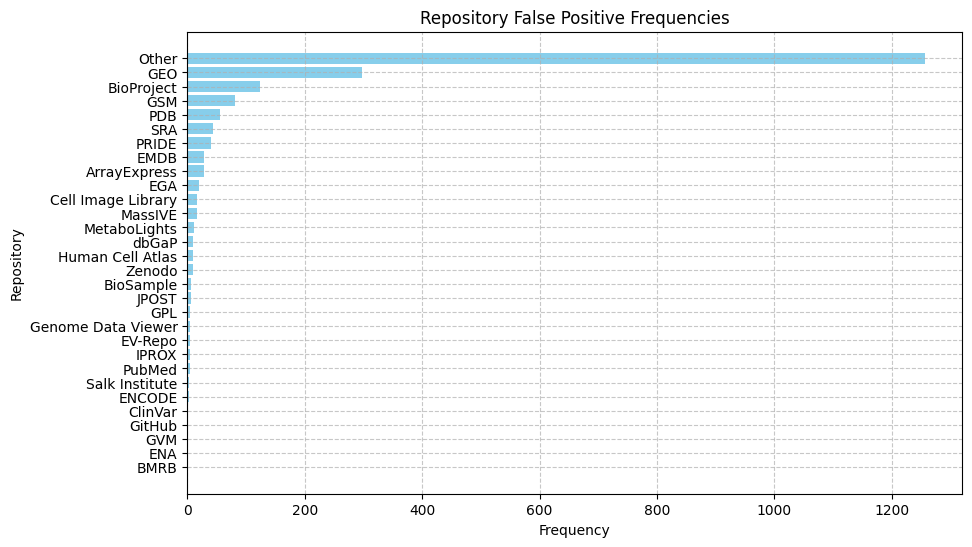

In [4]:
# Convert to DataFrame for display
repo_df = pd.DataFrame(list(repo_counts.items()), columns=['Repository', 'Frequency'])
repo_df.sort_values('Frequency', ascending=False, inplace=True)
# Display directly here# Plotting the frequencies
plt.figure(figsize=(10, 6))
plt.barh(repo_df['Repository'], repo_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Repository')
plt.title('Repository False Positive Frequencies')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [5]:
print(repo_df)

            Repository  Frequency
1                  GEO        207
7                Other         97
6           BioProject         89
3                  PDB         41
8                PRIDE         36
9         ArrayExpress         25
13               NIHMS         23
5                  ENA         22
0                  EGA         18
4                 EMDB         15
15             MassIVE         15
19             EV-Repo         14
11                 SRA         13
18    Human Cell Atlas          9
10  Cell Image Library          9
12        MetaboLights          8
24               dbGaP          7
14                 PMC          6
17               JPOST          4
16               IPROX          4
25      Salk Institute          3
28              ENCODE          3
20              PubMed          2
22             ClinVar          2
23           BioSample          2
26  Genome Data Viewer          2
21                 GVM          1
2                 BMRB          1
27      OSU Re